# Velocities and forces 

Consider the planar RR robot below

<img src="https://github.com/robotica-cem/cinematica-notebooks/blob/main/figures/2d-2dof-revolute.png?raw=true" width=400 />

We are interested in the position $p$ and velocity $v$ of the origin of the end frame, given in the spatial frame.

## The forward kinematics
First find the forward kinematics map
$$^Bp = f(\theta_1, \theta_2) = ^B T_E(\theta_1, \theta_2) ^E p. $$
To derive this, we define a frame L fixed in link 1 with its origin at the joint.

In [1]:
import sympy as sy
sy.init_printing()

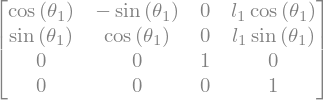

In [2]:
th1, th2, l1, l2 = sy.symbols('theta_1, theta_2, l_1, l_2')
c1 = sy.cos(th1)
s1 = sy.sin(th1)
c2 = sy.cos(th2)
s2 = sy.sin(th2)

T_BL = sy.eye(4)
T_BL[0,0] = c1
T_BL[1,1] = c1
T_BL[0, 1] = -s1
T_BL[1, 0] = s1
T_BL[0, 3] = l1*c1 
T_BL[1, 3] = l1*s1
T_BL

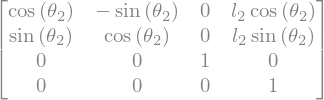

In [3]:
T_LE = sy.eye(4)
T_LE[0,0] = c2
T_LE[1,1] = c2
T_LE[0, 1] = -s2
T_LE[1, 0] = s2
T_LE[0, 3] = l2*c2 
T_LE[1, 3] = l2*s2
T_LE

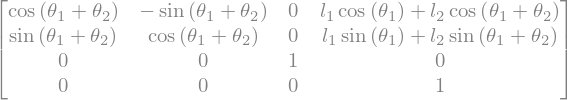

In [4]:
T_BE = sy.simplify(T_BL * T_LE)
T_BE

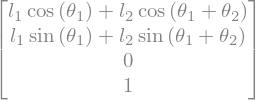

In [5]:
p_E = sy.Matrix([[0], [0], [0], [1]])
p_B = T_BE @ p_E
p_B

## The velocity of the end point.
Let 
$$ \theta = \begin{bmatrix} \theta_1\\\theta_2\end{bmatrix}. $$

Using the chain rule, we can find the velocity of the end point as
$$ ^B v = \frac{d}{dt} ^B p = \frac{d}{dt} f(\theta) = \underbrace{\frac{d}{d\theta} f(\theta)}_{J_s(\theta)} \frac{d\theta}{dt}, $$
where the 4 x 2 matrix $J_s(\theta)$ is called the *spatial Jacobian*, and is given by
$$ J_s(\theta) = \begin{bmatrix} \frac{\partial}{\partial\theta_1} f(\theta) & \frac{\partial}{\partial \theta_2} f(\theta) \end{bmatrix}. $$
Note that
$$ \frac{d}{dt} \theta = \begin{bmatrix} \dot{\theta_1}\\\dot{\theta}_2 \end{bmatrix}. $$

### Interpretation of the Jacobian
The velocity of the end point can be written
$$ ^B v = \begin{bmatrix} \frac{\partial}{\partial\theta_1} f(\theta) & \frac{\partial}{\partial \theta_2} f(\theta) \end{bmatrix}  \begin{bmatrix} \dot{\theta_1}\\\dot{\theta}_2 \end{bmatrix}, $$
From which we can interpret that the column $i$ of the Jacobian tells us how much a certain angular velocity $\dot{\theta}_i$ in that joint contributes to the velocity of the end point.

### Calculating the Jacobian
Since 
$$ f(\theta) = ^B T_E(\theta_1, \theta_2)\, ^E p = ^B T_L(\theta_1)\, ^LT(\theta_2)_E\, ^E p, $$
we get
$$\frac{\partial}{\partial\theta_1}f(\theta) = \left( \frac{\partial}{\partial\theta_1} ^B T_L(\theta_1)\right)\, ^LT(\theta_2)_E\, ^E p, $$
and
$$\frac{\partial}{\partial\theta_2}f(\theta) = ^BT(\theta_1)_L \,\left( \frac{\partial}{\partial\theta_2} ^L T_E(\theta_2)\right)\,  ^E p. $$
For instance,

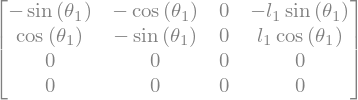

In [6]:
sy.diff(T_BL, th1)

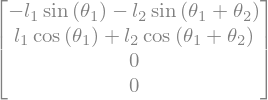

In [7]:
Jac_1 = sy.diff(T_BE, th1) @ p_E
Jac_1

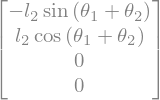

In [8]:
Jac_2 = sy.diff(T_BE, th2) @ p_E
Jac_2

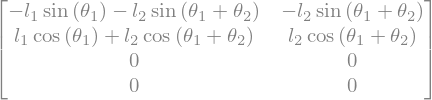

In [9]:
Jac_s = sy.Matrix.hstack(Jac_1, Jac_2)
Jac_s

### Exercise 
Compare the result above to the built-in sympy jacobian function

In [10]:
?sy.Matrix.jacobian

In [11]:
##############################
# Your code here
#############################

## Implementation

In [12]:
import numpy as np
import doctest

In [13]:
def RR_vel(th1, th2, th1dot, th2dot, l1=2, l2=1):
    """ Calculates the velocity of the end point of the planar RR robot
    
    Arguments
    ---------
    th1, th2 : float
       Angle in radians of the two degree of freedoms, respectively.
    th1dot, th2dot : float
       Angular velocity in radians/s of the two degree of freedoms, respectively.
    l1, l2 : float
       Length of the two links, respectively.
 
    Returns
    -------
    xdot : float
       The velocity of the end-effector (tool point) in the global x-direction 
    ydot : float
       The velocity of the end-effector (tool point) in the global y-direction 


    Tests
    ------
    1) 
    >>> l1, l2 = 2, 1
    >>> th1, th2 = 0,0
    >>> th1dot = 1
    >>> th2dot = 0
    >>> xdot, ydot = RR_vel(th1, th2, th1dot, th2dot, l1, l2)
    >>> np.allclose([xdot, ydot], [0, (l1+l2)*th1dot])
    True

    2) 
    >>> l1, l2 = 2, 1
    >>> th1, th2 = 0,0
    >>> th1dot = 0
    >>> th2dot = -1
    >>> xdot, ydot = RR_vel(th1, th2, th1dot, th2dot, l1, l2)
    >>> np.allclose([xdot, ydot], [0, l2*th2dot])
    True

    3) 
    >>> l1, l2 = 2, 1
    >>> th1, th2 = np.pi/2, 0
    >>> th1dot = 0
    >>> th2dot = 1
    >>> xdot, ydot = RR_vel(th1, th2, th1dot, th2dot, l1, l2)
    >>> np.allclose([xdot, ydot], [-l2*th2dot, 0])
    True
    
    4) 
    >>> l1, l2 = 2, 1
    >>> th1, th2 = np.pi/2, np.pi/2
    >>> th1dot = 1
    >>> th2dot = 0
    >>> xdot, ydot = RR_vel(th1, th2, th1dot, th2dot, l1, l2)
    >>> np.allclose([xdot, ydot], [-l1*th1dot, -l2*th1dot])
    True
    
    """
    
    c1 = np.cos(th1)
    s1 = np.sin(th1)
    c2 = np.cos(th2)
    s2 = np.sin(th2)
    c12 = np.cos(th1+th2)
    s12 = np.sin(th1+th2)
    
    # The jacobian
    # Derivative of forward map w.r.t theta_1
    J_s1 = np.array([-l1*s1 - l2*s12, l1*c1 + l2*c12, 0, 0])
    
    #################################################################
    # Your code here
    # Derivative of forward map w.r.t theta_2
    J_s2 = np.zeros(4) # This is wrong! Correct it 
    #################################################################
    
    
    J_s = np.vstack((J_s1, J_s2)).T
    
    # The vector of angular velocities
    thdot = np.array([th1dot, th2dot])
    
    v = J_s @ thdot
    
    #print(v)
    return v[0], v[1]


In [14]:
doctest.run_docstring_examples(RR_vel, globals())

**********************************************************************
File "__main__", line 38, in NoName
Failed example:
    np.allclose([xdot, ydot], [0, l2*th2dot])
Expected:
    True
Got:
    False
**********************************************************************
File "__main__", line 47, in NoName
Failed example:
    np.allclose([xdot, ydot], [-l2*th2dot, 0])
Expected:
    True
Got:
    False
